# Introduction to Regression with Neural Network in TensorFlow

There are many defination for regression problem but in our case , we are going to simplify it: predicting a numerical variable based on some other combination of variable , even shorter.. predicting a number.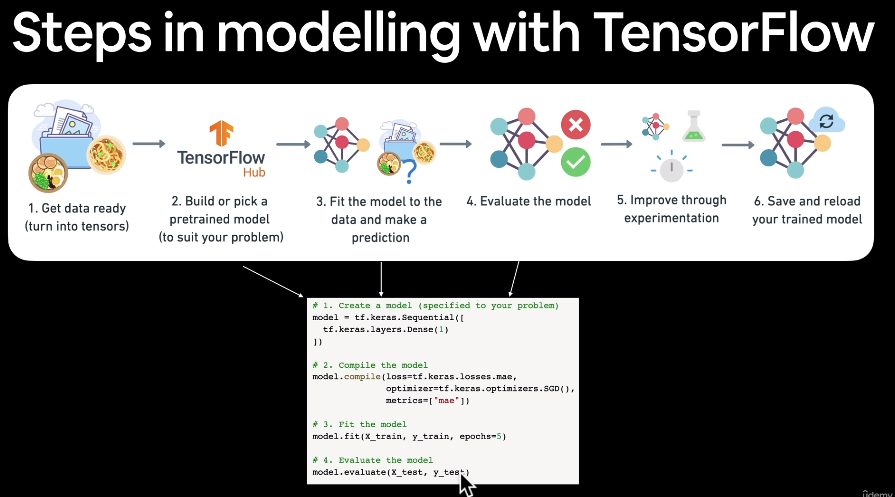

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

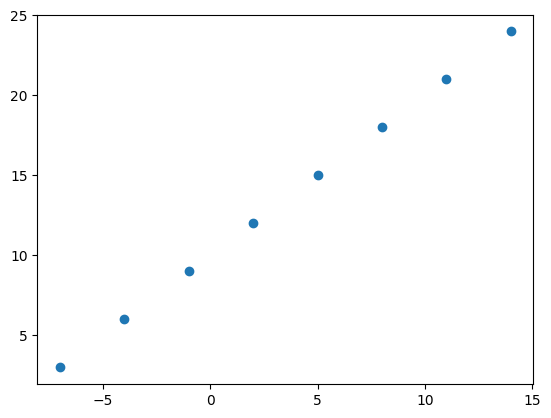

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)


In [ ]:
y==X +10 # this is relation X and Y (we want to learn)

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shape

In [ ]:
#  Creating demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([9397001])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9397001], dtype=int32)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

((), ())

In [ ]:
X[0].ndim # It has zero dimension, so that's why it has no shape.

0

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
#  Turn our NumPy into Tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

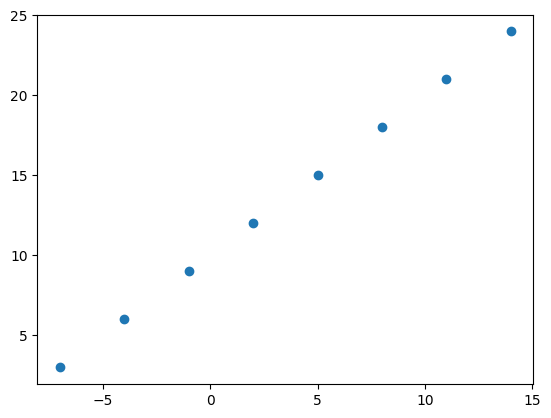

In [ ]:
plt.scatter(X,y)

## Steps in modeling with TensorFlow

1. **Creating a model**  - define the input and output layers as well the hidden layers of a deeplearning model.
2. **compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns of its learning) and evaluation matrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find pattrens between X & y (features and labels).
4. **Evaluate a model**

### mean absolute error
> loss = mean(abs(y_true - y_pred), axis=-1)
* on average how wrong our prediction
-----
## Gernal Steps in modeling with TensorFlow
1. Construct or import a pretrained model relevant to your problem
2. Compile the model (prepare it to be used with data)
	* **Loss** — how wrong your model's predictions are compared to the truth labels (you want to minimize this).
	* **Optimizer** — how your model should update its internal patterns to better its predictions.
	* **Metrics** — human interpretable values for how well your model is doing.
3. Fit the model to the training data so taht it can discover patterns
	* **Epochs** — how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)




In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
 tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradiant descent
              metrics = ["mae"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 514ms/step - loss: 12.8837 - mae: 12.8837
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 12.7512 - mae: 12.7512
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 12.6187 - mae: 12.6187
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 12.4862 - mae: 12.4862
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 12.3537 - mae: 12.3537


In [ ]:
#  Check out X and Y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#  Try and make a prediction  using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 88ms/step


array([[6.018246]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we tool to create a model.
1. **Creating a model** - here we might add more layer, increase each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** (the higher the learning rate, the more the  optimizer pushes the model to improve, whereas the lower the learning rate the smaller the steps) of the optimization function
3. **Fitting the  model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from).

----
**Commom ways to improve a deep model**
* Adding a layer
* Increase the number of hidden units
* Change the activation function
* Change the optimization fuction
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [ ]:
# lets rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

#  Fit the model (this time we will train for longer)

model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 455ms/step - loss: 15.0233 - mae: 15.0233
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 14.8243 - mae: 14.8243
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.6918 - mae: 14.6918
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5593 - mae: 14.5593
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4268 - mae: 14.4268
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 14.2943 - mae: 14.2943
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 14.1618 - mae: 14.1618
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.0293 - mae: 14.0293
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8968 - mae: 13.8968
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 13.7643 - mae: 13.7643
Epoch 11/100
1/1 [==============================

In [ ]:
#  Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Lets see if our models prediction have improved
model.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[29.533892]], dtype=float32)

In [ ]:
# 1. Create a model (this time with extra hidden layer with 100 hidden units )
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100 , activation=None),
    tf.keras.layers.Dense(1)

])

# 2. compile a model
model.compile(
        loss  = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics  = ["mae"]
)
# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 838ms/step - loss: 13.3952 - mae: 13.3952
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2943 - mae: 13.2943
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1935 - mae: 13.1935
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0926 - mae: 13.0926
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9917 - mae: 12.9917
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8908 - mae: 12.8908
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7899 - mae: 12.7899
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 12.6890 - mae: 12.6890
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 12.5880 - mae: 12.5880
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4870 - mae: 12.4870
Epoch 11/100
1/1 [==============================

In [ ]:
#  Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's tru to make a prediction
model.predict([17.0]) # model is overfitting

1/1 [==============================] - 0s 70ms/step


array([[30.383368]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you will go through when building neural network is:

```
Build  a model -> fit it -> evaluate it --> tweak a model -> evaluate it -> tweak a model -> evaluate it ...
```

When it comes to evaluation ... there are 3 words you should memorize:
> "Visualize ,Visualize , Visualize "

Its a good idea to Visualize:
* The data - what data we are working with? what does it look like ?
* The model itself - what does our model look like?
* The training of a model - how does perform while it learn?
* The pridiction of the model - how the prediction of a model line up against groud truth (the orignal  labels)?


In [ ]:
#  Make a bigger dataser
X =tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#  Make label for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

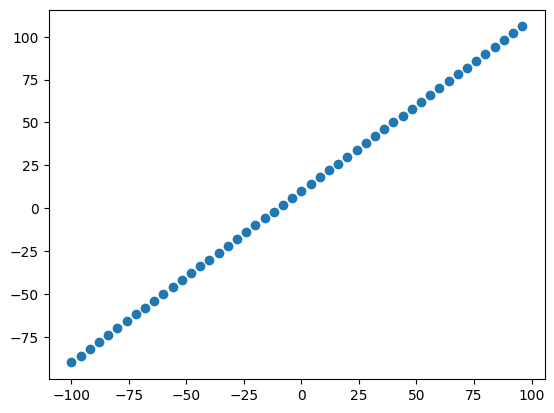

In [ ]:
#  Visual the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets ...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this data,which is typically 10-15% of the data avaible
* **Test set** - the model gets evaluated on this data  to test what is has learned , this set is typically 10-15% of the total data available .


In [ ]:
#  Check the length of how many samples we have
len(X)

50

In [ ]:
#  Split the data into train and test set
X_train = X[:40] #  first 40 are training sample (80% of the data)
y_train =y[:40]
X_test =X[40:] #  last 40 are testing sample (20% of the data)
y_test =y[40:]

len(X_train), len(X_test),len(y_train), len(y_test)

(40, 10, 40, 10)

### Visulating the data
Now we have got our data in training and test set lets visualize it again!

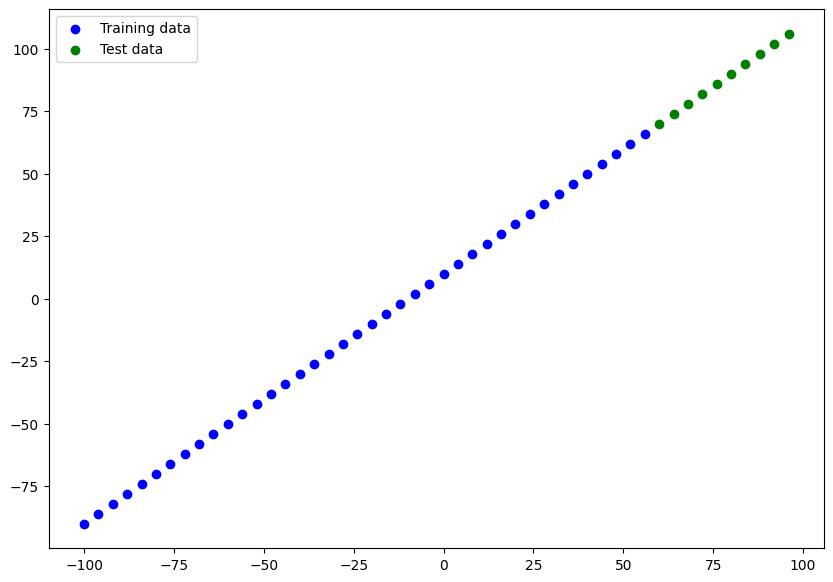

In [ ]:
plt.figure(figsize=(10,7))
# plot the training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")
# plot the test data in green
plt.scatter(X_test, y_test, c="g", label = "Test data")
#  show legend
plt.legend()

In [ ]:
#  Lets have a look at how to build a neural network for our data

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit a modle
# model.fit(X_train,y_train,epoches=100)

### Visualizing the Model

In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
#  lets create a model that build automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name = "model_1")
# compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total pramas - totals number of parameter of the model
* Trainable params - these are the parameters (patterns) the model can update as it trians
* Non-trainable params - these parameters are not updated during training (this is typically when you bring in already learn patterns or parameters from other models during **transfer learning** ).

📖 **Resource** for a more in-depth overview of the trainable parameters with a layer , check out **MIT's Introduction to deeplearning**

**Exercise:** Try playing around with the number of hidden units in the dense layer , see how that effect the number of parametres (total and trainable) by calling `model.summary()`.

In [ ]:
# fit the model
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
#  Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


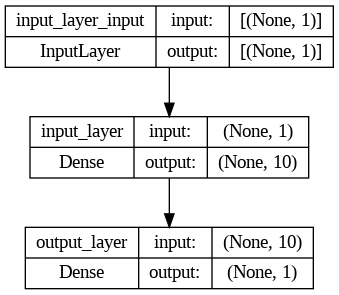

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing model's Predictions

To visualize prediction, it's a good idea to plot them against the ground truth

Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model's prediction).

In [ ]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[ 76.543884],
       [ 81.53155 ],
       [ 86.5192  ],
       [ 91.50686 ],
       [ 96.494514],
       [101.48216 ],
       [106.469826],
       [111.45748 ],
       [116.44514 ],
       [121.43279 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note** If you feel like you are going to reuse some kind of functionality in the futuire its a good idea to turn it into function

In [ ]:
# Lets create a plotting function
def plot_prediction(train_data = X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels = y_test,
                    predictions = y_pred):
  """
  Plots training data, test data and compares the predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Traing data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  # Plot model's  prediction in red
  plt.scatter(test_data, y_pred, c='r', label="Predictions")
  # Show the legend
  plt.legend()


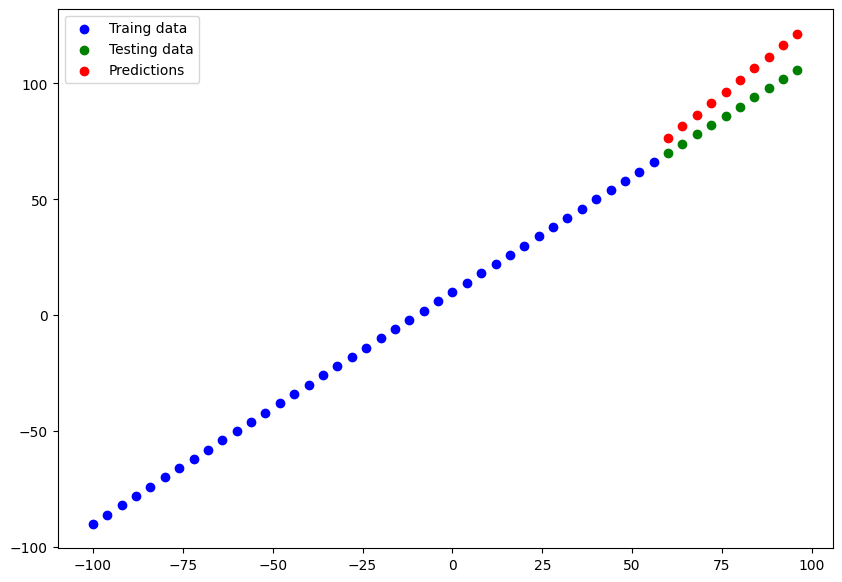

In [ ]:
plot_prediction(train_data = X_train,train_labels=y_train,test_data=X_test,test_labels = y_test,predictions = y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Deoending on the problem you are working on there will be different evaluation metrics to evaluate your model's performance

Since we are working on a regression , two of the main metrices
* **MAE** - maen absolute error , "on average, how wrong is each of my model's predictions"
* **MSE** - mean square error, "square the average error
* **Huber** - combination of MSE and MAE and it is less ssensitive to outlier

In [ ]:
# Evaluate the model on the test
model.evaluate (X_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 10.9883 - mae: 10.9883


[10.9883394241333, 10.9883394241333]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.273669, 10.987381, 10.      , 10.301372, 11.797806, 14.489298,
       18.469826, 23.457481, 28.445135, 33.432793], dtype=float32)>

In [ ]:
y_pred

array([[ 76.543884],
       [ 81.53155 ],
       [ 86.5192  ],
       [ 91.50686 ],
       [ 96.494514],
       [101.48216 ],
       [106.469826],
       [111.45748 ],
       [116.44514 ],
       [121.43279 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.543884,  81.53155 ,  86.5192  ,  91.50686 ,  96.494514,
       101.48216 , 106.469826, 111.45748 , 116.44514 , 121.43279 ],
      dtype=float32)>

In [ ]:
#  Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.98834>

In [ ]:
# Calcute the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.79121>

In [ ]:
#  Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it ->fit it -> evaluate it ->tweak it fit it -> evaluate it ...
```
1. Get more data - get more examples for our model for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger  (using a more complex model ) - this might in the form of more layers or more hidden units in each layers.
3. Train for longer - give your model more of a chance to find patterns in ths data.

Lets do 3 modelling experiments:
1. `model_1` - same as the orignal model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `madel_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
])
# compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# fit the model
model_1.fit(X_train,y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 74ms/step


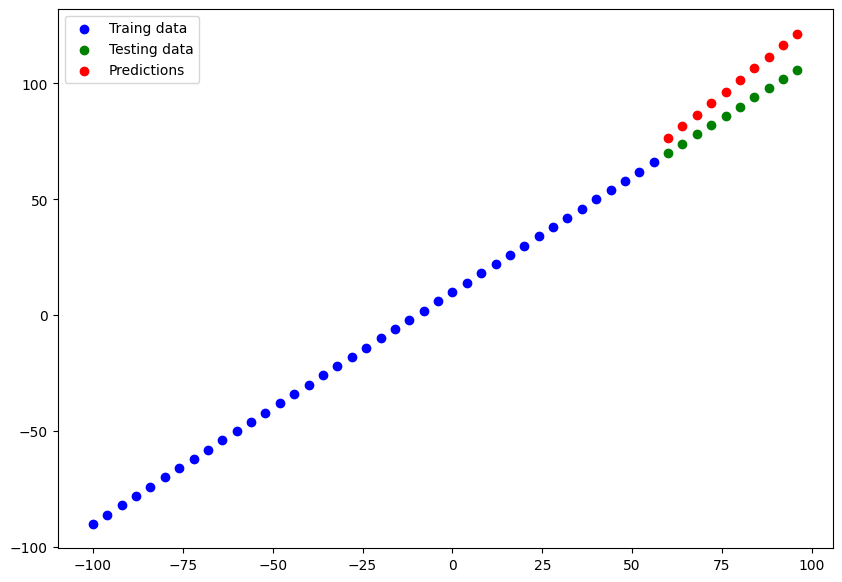

In [ ]:
# Make and plot predictions for model 1
y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 =mae(y_test, y_pred_1)
mse_1 =mse(y_test, y_pred_1)
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.604576>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.56101>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)
#  1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])
# 2. compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mse"])
# 3. Fit the model
model_2.fit(X_train, y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 48.5096 - mse: 3542.5461
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 26.6797 - mse: 940.0609
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 30.5237 - mse: 1422.8508
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.4214 - mse: 278.3169
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 20.3449 - mse: 565.5994
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1640 - mse: 90.8591
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1862 - mse: 377.5233
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1648 - mse: 434.7324
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 30.1284 - mse: 1238.9877
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0929 - mse: 197.4370
Epoch 11/100
2/2 [=============================

1/1 [==============================] - 0s 64ms/step


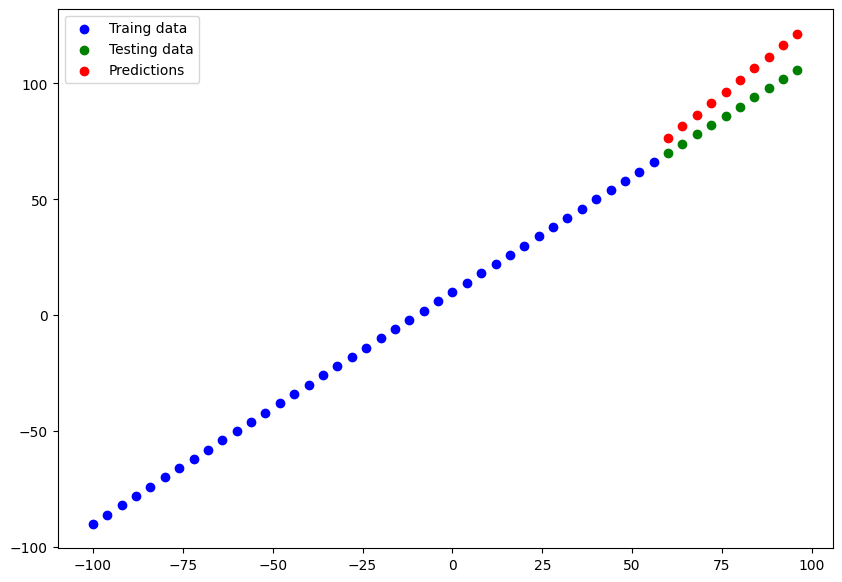

In [ ]:
# Make and plot prediction of model 2
y_pred_2 = model_2.predict(X_test)
plot_prediction(predictions=y_pred_2)

In [ ]:
#  Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.214826>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.60641>)

**Build `model_3`**

* 2 layers , trained for 500 epochs

In [ ]:
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1),

])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. fit the model
model_3.fit(X_train, y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 44.1865 - mae: 44.1865
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 33.3039 - mae: 33.3039
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 37.7804 - mae: 37.7804
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 26.1154 - mae: 26.1154
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.3489 - mae: 14.3489
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4874 - mae: 11.4874
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.5469 - mae: 12.5469
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0311 - mae: 11.0311
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 39.4493 - mae: 39.4493
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 26.9736 - mae: 26.9736
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 51ms/step


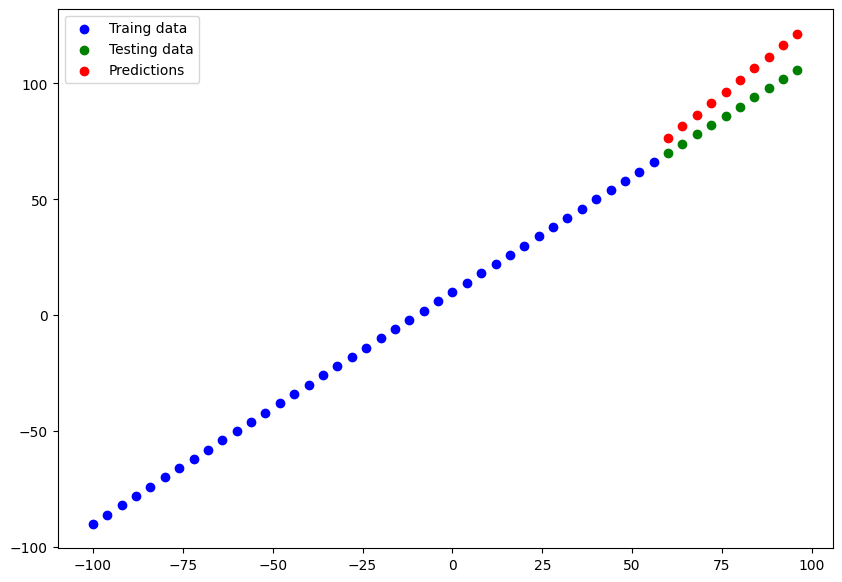

In [ ]:
# Make and plot some prediction
y_pred_3 = model_3.predict(X_test)
plot_prediction(predictions=y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.92124>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4697.7827>)

🔑 **Note:** You have start with the small eperiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of experiments
we have a few experiments, lets compare the results

In [ ]:
#  Lets compare our model's results using a pandas DataDrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(),mse_1.numpy()],
                 ["model_2", mae_2.numpy(),mse_2.numpy()],
                 ["model_3", mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns = ["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.604576,80.561012
1,model_2,13.214826,184.606415
2,model_3,67.921242,4697.782715


Looks like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **Note:** one of your main goals should be to minimize the time between your experiments. The more experiments you do the more things you will figure out which donot work and in turn , get closer to figuring out what does work. Remember the machine learning practioner's motto: **"experiment,experiment,experiment"**.

## Tracking your Experiments

One really good habbit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tidious if you are running of experiments
Luckily there are tools to help us

📖 **Resource:** As you build more model, yo will want to look into using:
* **TensorBoard** - a component of the TensorFlow library to help track modeling experiments (we will see this one later. )
* **Weights & Biases** - a tools for all kind of machine learning experiments (plays straight into TensorBoard)

## Saving our models

saving our model allows us to use then outside of google colab (or wherever they were traine) such as in a web application or mobile app.

There are two main formats we can save our model's too:
1. The savedModel format
2. The HDF5 format

In [ ]:
#  Save model using SavedModel format
model_2.save("best_model_SaveModel_format")

In [ ]:
#  Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading Save model

In [ ]:
#  load in the SaveModel format model
lodded_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_format")
lodded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 prediction with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
lodded_SavedModel_format_preds = lodded_SavedModel_format.predict(X_test)
model_2_preds ==lodded_SavedModel_format_preds

1/1 [==============================] - 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#  Compare the mae of model_2_preds and lodded_SavedModel_format_preds
mae(y_true=y_test,y_pred=model_2_preds)==mae(y_true=y_test,y_pred=lodded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#  check to see if loaded .h5 model prediction match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 68ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#  Compare the mae of model_2_preds and loaded_h5_model_preds
mae(y_true=y_test,y_pred=model_2_preds)==mae(y_true=y_test,y_pred=loaded_h5_model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## Download a model (or any other file) from google Colab

If you want to downlaod your files from google Colab:
1. You can go to the "files" tab and right click "download"
2. Use code (see the cell bellow)
3. Save it to Google drive by connecting Google drive and copying it there (see 2nd code cell)


In [ ]:
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#  save a file from Google Colab to Google drive (requires mounting Google drive)
!cp best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Developer_Certificate_in_2021_Zero_to_Mastery/2024/01_neural_network_regression_in_tensorflow

In [ ]:
!ls /content/drive/MyDrive/TensorFlow_Developer_Certificate_in_2021_Zero_to_Mastery/2024/01_neural_network_regression_in_tensorflow

01_neural_network_regression_with_tensorflow.ipynb  best_model_HDF5_format.h5


## A larger example

In [94]:
#  Import required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

**Medical Cost Personal Datasets**

Columns
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

> 🔑**Resources:**
https://www.kaggle.com/datasets/mirichoi0218/insurance


In [95]:
#  Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [98]:
# Lets try one-hot encode our Dataframe so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [100]:
#  Creating X and y value (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y= insurance_one_hot["charges"]


In [101]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [102]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [103]:
#  Create training and test sets
# Sikitlearn train test set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
#  Build a nueral network { sort of like model_2 above}


In [106]:
tf.random.set_seed(42)
# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
# 3. fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8719.8926 - mae: 8719.8926
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7880.2759 - mae: 7880.2759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7607.4248 - mae: 7607.4248
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7710.3809 - mae: 7710.3809
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7649.5576 - mae: 7649.5576
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7605.6064 - mae: 7605.6064
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7533.7188 - mae: 7533.7188
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7723.2104 - mae: 7723.2104
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7609.7930 - mae: 7609.7930
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7700.9546 - mae: 7700.9546

In [108]:
#  check the results of the insurance  model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 6ms/step - loss: 7379.3267 - mae: 7379.3262


[7379.32666015625, 7379.326171875]

In [110]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

 Right now it look like our model is not performing too well .. lets try and improve !

 To try improve our model we will run 2 experiments:
 1. Add an extra layers with more hidden units and use Adam optimizer
 2. Same as above but train for longer (200 epochs)
 3. (insert your experiments here)

In [118]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])
# 2. Compile a model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
# 3. fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13293.5234 - mae: 13293.5234
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13132.3164 - mae: 13132.3164
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12796.4619 - mae: 12796.4619
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12128.9834 - mae: 12128.9834
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10998.9697 - mae: 10998.9697
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9537.4570 - mae: 9537.4570
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8188.4263 - mae: 8188.4263
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7530.7705 - mae: 7530.7705
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7420.2773 - mae: 7420.2773
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7399.3169 - mae:

In [119]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4855.4087 - mae: 4855.4087


[4855.40869140625, 4855.40869140625]

In [120]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7379.3267 - mae: 7379.3262


[7379.32666015625, 7379.326171875]

In [121]:
# set random seed
tf.random.set_seed(42)
# 1. create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
# 2. compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
# 3. fit the model
history = insurance_model_3.fit(X_train ,y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 2s 5ms/step - loss: 13280.5830 - mae: 13280.5830
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13068.5684 - mae: 13068.5684
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 12656.5547 - mae: 12656.5547
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11864.6025 - mae: 11864.6025
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10587.3096 - mae: 10587.3096
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9066.8955 - mae: 9066.8955
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7852.1187 - mae: 7852.1187
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7455.9185 - mae: 7455.9185
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7405.3740 - mae: 7405.3740
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7385.1875 - mae:

In [122]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3481.3359 - mae: 3481.3359


[3481.3359375, 3481.3359375]

In [124]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 7379.3267 - mae: 7379.3262


[7379.32666015625, 7379.326171875]

Text(0.5, 0, 'epochs')

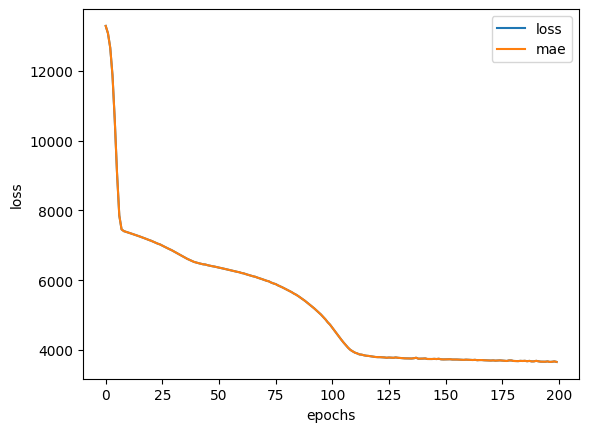

In [125]:
#  Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long shoukd you train for ?

It depends Really..it depends on the problem you are working on. However, many people have asked this question before.. so TensorFow has a solution  Its called the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) , which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.


## Preprocessing data (normalization and standardization)

In term of scaling values, neural network tend to prefer normalization.

If you are not sure on which to use, you should try both and see which performs better.

[Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=Standardize%20generally%20means%20changing%20the,is%20prone%20to%20creating%20confusion.)


In [133]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

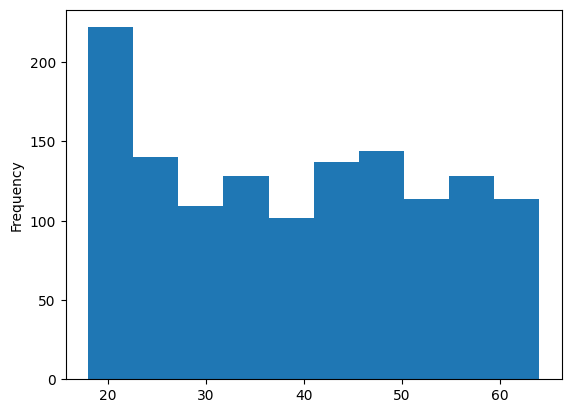

In [136]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

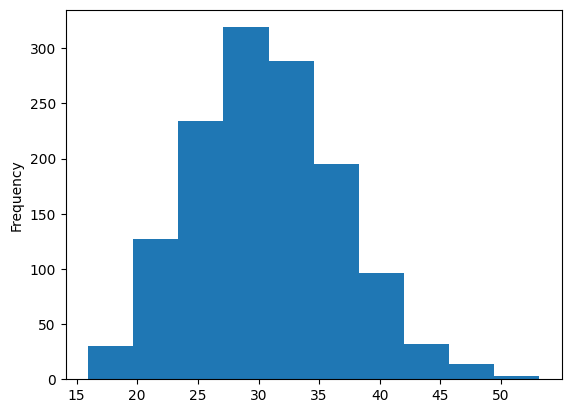

In [137]:
X["bmi"].plot(kind="hist")

In [139]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [140]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To  prepare our data, we can borrow a few classes from Scikit-Learn

In [143]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column tranformer
ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]), #  turn all values in these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#  Create X and y value
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#  Build our train and test sets
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [148]:
#  What does our data look like now?
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [149]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

Beautifull! Our data has been normalized and one hot encodded. Now let's build a neural network model on it and see how it goes

In [150]:
insurance_model_3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 100)               1200      
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4855.4087 - mae: 4855.4087

In [151]:
#  Build a neural network model to fit on our normalize data
# set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
# 2. compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])
# 3. fit the model
history = insurance_model_4.fit(X_train_normal,y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13343.8047 - mae: 13343.8047
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 13335.0391 - mae: 13335.0391
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13313.4316 - mae: 13313.4316
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13268.2070 - mae: 13268.2070
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13187.6943 - mae: 13187.6943
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 13060.7461 - mae: 13060.7461
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 12877.2500 - mae: 12877.2500
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12627.2539 - mae: 12627.2539
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12300.6436 - mae: 12300.6436
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11894.24

In [152]:
# Evalueate our insurance model on trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 5ms/step - loss: 3434.7119 - mae: 3434.7119


[3434.7119140625, 3434.7119140625]

Text(0.5, 0, 'epochs')

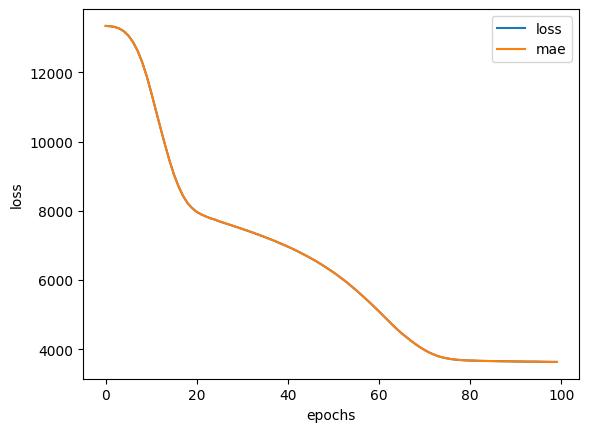

In [153]:
#  Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")